## <center><ins>Project 2 - Building Bridges and Beams</ins>
<center> $\color{red}{\text{Due in Gradescope 11 April 2023 at 11:59 PM MDT}}$
    
$\textbf{By Scott Hardman, Alex Livingston, Erik Sorenson}$

# 1 Introduction

In this project we will consider two problems from civil engineering using techniques from linear algebra and differential equations. The
first problem involves the distribution of forces in a simple bridge, and the second is concerned with the deflection of a beam under uniform
loading.

# 2 Distribution of Forces in a Bridge

### 2.1 Background

In bridge design, one is interested in connecting lightweight pieces together to make a truss which can support weight. The pieces of the
truss (black lines in Figure 1) are connected together by pin joints (blue boxes) which are designed to rotate and transfer forces between the
pieces.

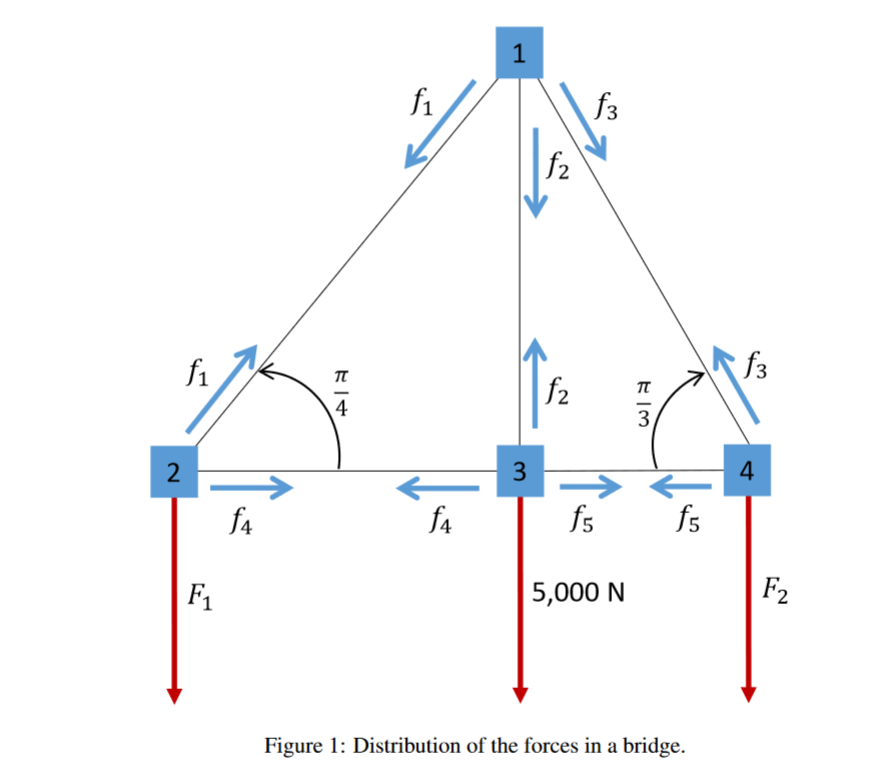

Figure 1: Distribution of the forces in a bridge.

In the diagram in Figure 1, each arrow indicates the direction of a force and is labeled according to its magnitude. Blue arrows indicate
forces on the joints due to tension in the corresponding piece of the truss, and red arrows indicate external forces on the joints. In a given
piece of the truss, a positive value for fi
indicates tension, while a negative value indicates compression. Pin joints 2 and 4 are held in
place vertically by external forces F1 and F2, respectively, but are free to move horizontally. The remaining pin joints are free to move both
horizontally and vertically. A load of 5000 newtons is placed at joint 3, and the problem is to determine the remaining unknown tensions
and forces in the bridge.

In order for the bridge to be in equilibrium, both the horizontal and vertical components of force must sum to zero at each of the pin joints.
For example, consider pin joint 2. Balancing the forces in the horizontal and vertical directions gives two equations:

$$\text{Horizontal:  } f_1 \cos \frac{\pi}{4}+f_4=0,\qquad \text{Vertical:  } f_1 \sin \frac{\pi}{4} = F_1.$$

### 2.2 Task Set A

#### 1.

Using the diagram of the bridge in Figure 1, write down a set of linear equations for the unknown tensions $(f1, f2, f3, f4, f5)$ and external forces $(F1, F2)$. Display your equations by completing the following table:

<center>$\color{red}{\text{TO DO}}$

#### 2.

(a) Write the linear system of equations from problem 1 in the form $A\vec{f}=\vec{b}$. where
$$\vec{f}=\left[\, f_1\, f_2\, f_3\, f_4\, f_5\, F_1\, F_2\,\right]^{T}$$

$$\begin{bmatrix}
        \frac{\sqrt{3}}{2} & 0 & \frac{1}{2} & 0 & 0 & 0 & 0 \\
        \frac{\sqrt{2}}{2} & 0 & 0 & 1 & 0 & 0 & 0 \\
        0 & 0 & 0 & 1 & 1 & 0 & 0 \\
        0 & 0 & \frac{1}{2} & 0 & 1 & 0 & 0 \\
        \frac{\sqrt{2}}{2} & 1 & \frac{\sqrt{3}}{2} & 0 & 0 & 0 & 0 \\
        \frac{\sqrt{2}}{2} & 0 & 0 & 0 & 0 & 1 & 0 \\
        0 & 1 & 0 & 0 & 0 & 0 & 0 \\
        0 & 0 & \frac{\sqrt{3}}{2} & 0 & 0 & 0 & 1 \\
    \end{bmatrix}
\times
\begin{bmatrix}
        f_1 \\
        f_2 \\
        f_3 \\
        f_4 \\
        f_5 \\
        F_1 \\
        F_2 \\
    \end{bmatrix}
=
\begin{bmatrix}
        0 \\
        0 \\
        0 \\
        0 \\
        0 \\
        5000 \\
        0 \\
    \end{bmatrix}
$$

(b) What are the orders of $A$, $\vec{f}$, and $\vec{b}$? Check your answer using the size function in Matlab. Is the system overdetermined or
underdetermined or neither?

Orders of the following matrices:

$A$ = 8 x 7

$\vec{f}$ = 7 x 1

$\vec{b}$ = 7 x 1

This set of matrices will allow for $A$ and $\vec{f}$ to be multiplied together due to their dimension to output a 7 x 1 matrix.

(c) Is it possible to calculate the determinant of A? If so, find it. If not, explain why not.

No, because in order to calculate the determinant, it requires the matrix to be a square n x n matrix, which $A$ is an n x m matrix.

#### 3.

(a) Form the augmented matrix for the linear system and put it into reduced row echelon form (RREF). Feel free to use the rref command in Matlab. Include the RREF of this augmented matrix in your report.

In [3]:
import sympy as sp
import numpy as np

# Define the matrix
A = sp.Matrix([[np.sqrt(3)/2, 0, 1/2, 0, 0, 0, 0],\
               [np.sqrt(2)/2, 0, 0, 1, 0, 0, 0],\
               [0, 0, 0, 1, 1, 0, 0],\
               [0, 0, 1/2, 0, 1, 0, 0],\
               [np.sqrt(2)/2, 1, np.sqrt(3)/2, 0, 0, 0, 0],\
               [np.sqrt(2)/2, 0, 0, 0, 0, 1, 0],\
               [0, 1, 0, 0, 0, 0, 0],\
               [0, 0, np.sqrt(3)/2, 0, 0, 0, 1]])

print("This is our augmented matrix:\n")
A = A.col_insert(7, sp.Matrix([0, 0, 0, 0, 0, 0, 5000, 0]))
sp.pprint(A)

This is our augmented matrix:

⎡0.866025403784439  0         0.5         0  0  0  0   0  ⎤
⎢                                                         ⎥
⎢0.707106781186548  0          0          1  0  0  0   0  ⎥
⎢                                                         ⎥
⎢        0          0          0          1  1  0  0   0  ⎥
⎢                                                         ⎥
⎢        0          0         0.5         0  1  0  0   0  ⎥
⎢                                                         ⎥
⎢0.707106781186548  1  0.866025403784439  0  0  0  0   0  ⎥
⎢                                                         ⎥
⎢0.707106781186548  0          0          0  0  1  0   0  ⎥
⎢                                                         ⎥
⎢        0          1          0          0  0  0  0  5000⎥
⎢                                                         ⎥
⎣        0          0  0.866025403784439  0  0  0  1   0  ⎦


In [11]:
# Put the matrix in reduced row echelon form
rref, _ = A.rref()

# Print the result
print("The matrix in rref is:")
sp.pprint(rref)

The matrix in rref is:
⎡1  0  0  0  0  0  0  0⎤
⎢                      ⎥
⎢0  1  0  0  0  0  0  0⎥
⎢                      ⎥
⎢0  0  1  0  0  0  0  0⎥
⎢                      ⎥
⎢0  0  0  1  0  0  0  0⎥
⎢                      ⎥
⎢0  0  0  0  1  0  0  0⎥
⎢                      ⎥
⎢0  0  0  0  0  1  0  0⎥
⎢                      ⎥
⎢0  0  0  0  0  0  1  0⎥
⎢                      ⎥
⎣0  0  0  0  0  0  0  1⎦


$$
\begin{bmatrix}
        1 & 0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 1 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 1 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 & 1 & 0 \\
        0 & 0 & 0 & 0 & 0 & 0 & 1 \\
        0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    \end{bmatrix}
$$

(b) What is the rank of A?

Rank is the number of pivots, which are the columns with all zeros and one 1 value. This matrix has 6 pivots, meaning its rank is 6.

(c) Is the linear system $A\vec{f}=\vec{b}$ consistent?

<center>$\color{red}{\text{TO DO}}$

(d) What are the tensions and external forces in the bridge? Display your answer in a table.

In [14]:
# Solve the system of equations
f1, f2, f3, f4, f5, F1, F2 = sp.symbols('f1 f2 f3 f4 f5 F1 F2')
solved = sp.linsolve((A, sp.Matrix([f1, f2, f3, f4, f5, F1, F2])))

# Sort the solution by variable
sorted_sol = sorted(list(solved), key=lambda x: x[0])

# Print the solution
print("\nThe solution is:")
for s in sorted_sol:
    print("{0} = {1}".format(s[0], s[1]))


The solution is:
6.29252873988395*f1 - 6.29252873988395*f2 + 6.29252873988395*f3 - 6.29252873988395*f4 = 3.25725255947386*f1 - 4.98930336704274*f2 + 4.98930336704274*f3 - 4.98930336704274*f4 + 1.0*f5


(e) Which piece of the truss is being stretched the most? Which piece is being compressed the most?

<center>$\color{red}{\text{TO DO}}$

#### 4.

Suppose the load of 5,000 newtons at joint 3 is replaced by the “free” (unknown) force, $F_3$.

(a) Write the system in the form $A\vec{f}=\vec{b}$. where $\vec{f}=\left[\, f_1\, f_2\, f_3\, f_4\, f_5\, F_1\, F_2\, F_3 \,\right]^{T}$

<center>$\color{red}{\text{TO DO}}$

(b) What are the orders of A, $\vec{f}$, and $\vec{b}$? Is the system overdetermined, underdetermined or neither?

The new orders of the matrices are as follows:

$A$ = 8 x 8

$\vec{f}$ = 8 x 1

$\vec{b}$ = 8 x 1

This now means that the system is neither overdetermined or underdetermined as $A$ is a square matrix meaning that there are an equal number of unknowns and equations.

In [7]:
# Define the new matrix
newA = sp.Matrix([[np.sqrt(3)/2, 0, 1/2, 0, 0, 0, 0, 0],\
               [np.sqrt(2)/2, 0, 0, 1, 0, 0, 0, 0],\
               [0, 0, 0, 1, 1, 0, 0, 0],\
               [0, 0, 1/2, 0, 1, 0, 0, 0],\
               [np.sqrt(2)/2, 1, np.sqrt(3)/2, 0, 0, 0, 0, 0],\
               [np.sqrt(2)/2, 0, 0, 0, 0, 1, 0, 0],\
               [0, 1, 0, 0, 0, 0, 0, 1],\
               [0, 0, np.sqrt(3)/2, 0, 0, 0, 1, 0]])

print("This is our augmented matrix:\n")
newA

This is our augmented matrix:



Matrix([
[0.866025403784439, 0,               0.5, 0, 0, 0, 0, 0],
[0.707106781186548, 0,                 0, 1, 0, 0, 0, 0],
[                0, 0,                 0, 1, 1, 0, 0, 0],
[                0, 0,               0.5, 0, 1, 0, 0, 0],
[0.707106781186548, 1, 0.866025403784439, 0, 0, 0, 0, 0],
[0.707106781186548, 0,                 0, 0, 0, 1, 0, 0],
[                0, 1,                 0, 0, 0, 0, 0, 1],
[                0, 0, 0.866025403784439, 0, 0, 0, 1, 0]])

(c) Is it possible to calculate the determinant of A? If so, find it. If not, explain why not.

In [49]:
# Find the determinant of our new A
det_newA = newA.det()
print("The determinant of our new matrix is: ")
sp.pprint(det_newA)

The determinant of our new matrix is: 
0.0794593112989455


Yes, as $A$ is now a square matrix we are able to calculate the determinant.

(d) Can the coefficient matrix be inverted? If so, find the inverse of matrix A. If not, explain why not.

In [9]:
# Find the determinant of our new A
inv_newA = newA.inv()
print("The inverse of our new matrix is: ")
inv_newA

The inverse of our new matrix is: 


Matrix([
[ 6.29252873988395, -6.29252873988395,  6.29252873988395, -6.29252873988395,    0,   0,   0,   0],
[ 3.25725255947387, -4.98930336704274,  4.98930336704274, -4.98930336704274,  1.0,   0,   0,   0],
[-8.89897948556637,  10.8989794855664, -10.8989794855664,  10.8989794855664,    0,   0,   0,   0],
[-4.44948974278318,  5.44948974278318, -4.44948974278318,  4.44948974278318,    0,   0,   0,   0],
[ 4.44948974278318, -5.44948974278318,  5.44948974278318, -4.44948974278318,    0,   0,   0,   0],
[-4.44948974278318,  4.44948974278318, -4.44948974278318,  4.44948974278318,    0, 1.0,   0,   0],
[ 7.70674230225705, -9.43879310982593,  9.43879310982593, -9.43879310982593,    0,   0,   0, 1.0],
[-3.25725255947387,  4.98930336704274, -4.98930336704274,  4.98930336704274, -1.0,   0, 1.0,   0]])

(e) Is the resulting linear system still solvable? If so, solve it. If not, explain why not. Include any matrices you use to solve the
system in your report and display your solution in a table.

In [10]:
newA.rref()

(Matrix([
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1]]),
 (0, 1, 2, 3, 4, 5, 6, 7))

<center>$\color{red}{\text{TO DO}}$

#### 5.

If $F_1$ and $F_2$ turn out to be negative, what does this mean physically?

This would mean that the two forces are being created by supports on either end of the truss.

# 3  Deflection of a Uniform Beam

### 3.1 Introduction

The second civil engineering problem we will study is to estimate the deflection y(x) of a beam under uniform loading, where the ends of
the beam held in place (see Figure 2). With some simplifying assumptions, the deflection of a beam supported at x = 0 and x = L can be
modeled by the boundary value problem (BVP)

$$y''=\frac{S}{EI}y+\frac{Qx}{2EI}(x-L),\;\; 0\le x\le L,\;\; y(0)=0,\;\; y(L)=0,$$

where $y(x)$ is the deflection of the beam, $L$ is the length of the beam, $Q$ is the intensity of the uniform load, $E$ is the modulus of elasticity,
$S$ is the stress at the endpoints, and $I$ is the central moment of inertia.

Our goal is to find an approximate solution for $(1)$ using Matlab’s ode45 but first we need to introduce second order initial value problems
(IVPs) and the method of linear shooting.

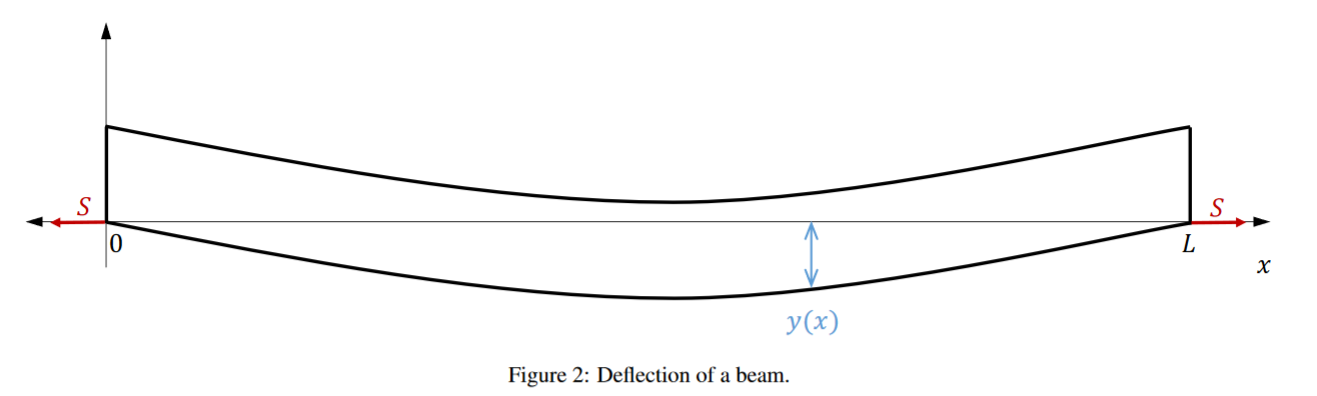

### 3.2 Second Order Initial Value Problems

We have seen plenty of first order initial value problems (IVPs), but you may not have seen many second order ones yet. In general, a second
order IVP looks like

$$y''=f(t,y,y'), \;\; y(t_0) = y_1, \;\; y'(t_0) = y_2.$$

Notice that a second order IVP has two initial conditions; one for $y$ and one for $y′$, both given at the same initial value of the independent
variable (usually time), $t_0$

Written in this form, the solution to $(2)$ cannot be directly approximated using one of Matlab’s standard built-in ODE solvers, such as
ode45. However, since Matlab’s solvers are designed for systems of first order IVPs, we would like to write the IVP in $(2)$ without using
any second derivatives. To do this, define the new function $z(t) = y′(t)$, so that the original second order IVP can be written as a system of
two first order IVPs: 

$$\begin{bmatrix}
        y' \\
        z' \\
    \end{bmatrix}
=
\begin{bmatrix}
        z \\
        f(t,y,z) \\
    \end{bmatrix},\;\;\;
\begin{bmatrix}
        y(t_0) \\
        z(t_0) \\
    \end{bmatrix}
=
\begin{bmatrix}
        y_1 \\
        y_2 \\
    \end{bmatrix}
$$

In this form, the solution can be approximated using one of Matlab’s built-in ODE solvers.

### 3.3 Linear Shooting

The linear shooting method is used to find an approximate solution to a linear second order boundary value problem (BVP), which has the
form

$$y′′ = p(x)y′ + q(x)y + r(x),\;\; a \le x \le b,\;\; y(a) = \alpha,\;\; y(b) = \beta$$

Here, $p(x)$, $q(x)$, and $r(x)$ are continuous on $[a, b]$, and $q(x) > 0$ on $[a, b]$. The BVP is guaranteed to have a unique solution, but in its
current form we don’t have the tools to solve it, even approximately. We learned in Section 3.2 how to transform a second order IVP into a
system of first order IVPs, but $(3)$ is not an IVP at all. Notice that instead of having two conditions ($y$ and $y′$) on the solution at the same the
point (an IVP), the BVP has two conditions on the solution, $y$, but at different points.

To apply the linear shooting method, we temporarily set aside the BVP in $(3)$, and instead consider two closely related and cleverly chosen
IVPs:

$$y′′ = p(x)y′ + q(x)y + r(x), a ≤ x ≤ b, y(a) = α, y′(a) = 0, (4)$$
$$y′′ = p(x)y′ + q(x)y, a ≤ x ≤ b, y(a) = 0, y′(a) = 1.$$ 